<a href="https://colab.research.google.com/github/DayeonWi/project-/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

컴퓨터 비전

MNIST 데이터셋으로 학습한 모형

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
469/469 - 11s - loss: 0.9196 - accuracy: 0.7843 - val_loss: 0.5331 - val_accuracy: 0.8713 - 11s/epoch - 22ms/step
Epoch 2/50
469/469 - 7s - loss: 0.4903 - accuracy: 0.8738 - val_loss: 0.4197 - val_accuracy: 0.8897 - 7s/epoch - 16ms/step
Epoch 3/50
469/469 - 5s - loss: 0.4174 - accuracy: 0.8874 - val_loss: 0.3756 - val_accuracy: 0.8967 - 5s/epoch - 11ms/step
Epoch 4/50
469/469 - 4s - loss: 0.3826 - accuracy: 0.8946 - val_loss: 0.3509 - val_accuracy: 0.9026 - 4s/epoch - 9ms/step
Epoch 5/50
469/469 - 4s - loss: 0.3613 - accuracy: 0.8994 - val_loss: 0.3345 - val_accuracy: 0.9068 - 4s/epoch - 9ms/step
Epoch 6/50
469/469 - 5s - loss: 0.3462 - accuracy: 0.9029 - val_loss: 0.3237 - val_accuracy: 0.9099 - 5s/epoch - 11ms/step
Epoch 7/50
469/469 - 4s - loss: 0.3350 - accuracy: 0.9061 - val_loss: 0.3143 - val_accuracy: 0.9121 - 4s/epoch - 8ms/step
Epoch 8/50
469/469 - 4s - loss: 0.3260 - accuracy: 0.9082 - val_loss: 0.307

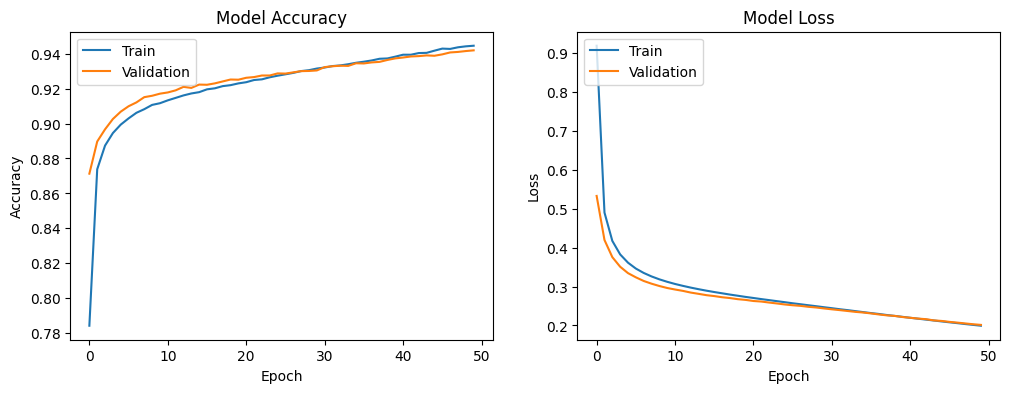

Accuracy= 94.19000148773193


In [ ]:
import numpy as np # NumPy 라이브러리를 가져오는 Python Import문
import tensorflow as tf # tensorflow library를 코드로 가져온 Python Import문
import tensorflow.keras.datasets as ds # ds라는 별칭을 사용하여 tensorflow.keras 모듈의 데이터셋 하위 모듈을 코드로 가져오는 Python Import문
import matplotlib.pyplot as plt # Matplotlib 라이브러리를 가져오고, plt라는 별칭으로 사용하겠다는 것을 의미

from tensorflow.keras.models import Sequential # TensorFlow의 Keras 라이브러리에서 Sequential 모델을 가져오는 것을 의미
from tensorflow.keras.layers import Dense # TensorFlow의 Keras 라이브러리에서 Dense 층을 가져오는 것을 의미
from tensorflow.keras.optimizers import SGD # TensorFlow의 Keras 라이브러리에서 SGD(Stochastic Gradient Descent) 옵티마이저를 가져오는 것을 의미

# MNIST 데이터 집합 로드
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data() # MNIST 데이터셋을 로드하는 과정을 나타냄

# 데이터 전처리
x_train = x_train.reshape(60000, 784).astype(np.float32) / 255.0 # MNIST 데이터셋의 이미지 데이터인 `x_train`을 전처리하는 과정을 나타냄
x_test = x_test.reshape(10000, 784).astype(np.float32) / 255.0 # MNIST 데이터셋의 테스트 이미지 데이터인 `x_test`를 전처리하는 과정을 나타냄
y_train = tf.keras.utils.to_categorical(y_train, 10) # MNIST 데이터셋의 훈련 데이터의 레이블인 `y_train`을 원-핫 인코딩(one-hot encoding) 형식으로 변환하는 과정을 나타냄
y_test = tf.keras.utils.to_categorical(y_test, 10) # MNIST 데이터셋의 테스트 데이터의 레이블인 `y_test`를 원-핫 인코딩(one-hot encoding) 형식으로 변환하는 과정을 나타냄

# Create the model(모델 생성)
mlp = Sequential() # Sequential 모델 객체를 생성하는 과정을 나타냄
mlp.add(Dense(units=512, activation='tanh', input_shape=(784,))) # Sequential 모델에 Dense 레이어를 추가하는 과정을 나타냄
mlp.add(Dense(units=10, activation='softmax')) # Sequential 모델에 또 다른 Dense 레이어를 추가하는 과정을 나타냄

# Compile the model(모델 컴파일)
mlp.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy']) # Sequential 모델을 컴파일하는 과정을 나타냄

# 학습 곡선 표시를 위한 모델 학습 과정
history = mlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2) # Sequential 모델을 학습시키는 과정을 나타

# 학습 곡선 그림(정확도 및 손실)
plt.figure(figsize=(12, 4)) # 새로운 그래프를 생성하는 역할을 함

# 학습 및 검증 정확도 값
plt.subplot(1, 2, 1) # 1행 2열로 나눈 그림에서 첫 번째 서브플롯을 선택하는 역할을 함
plt.plot(history.history['accuracy']) #Matplotlib 라이브러리를 사용하여 그래프를 그리는 역할
plt.plot(history.history['val_accuracy']) #Matplotlib 라이브러리를 사용하여 그래프를 그리는 역할
plt.title('Model Accuracy') #Matplotlib 라이브러리를 사용하여 그래프의 제목을 설정하는 역할
plt.xlabel('Epoch') #Matplotlib 라이브러리를 사용하여 x축의 레이블을 설정하는 역할
plt.ylabel('Accuracy') #Matplotlib 라이브러리를 사용하여 y축의 레이블을 설정하는 역할
plt.legend(['Train', 'Validation'], loc='upper left') # Matplotlib 라이브러리를 사용하여 그래프에 범례(legend)를 설정하는 역할

# 학습 및 검증 손실 값의 그래프
plt.subplot(1, 2, 2) #Matplotlib 라이브러리를 사용하여 그래프를 여러 개의 서브플롯(subplot)으로 나누고, 현재 작업 중인 서브플롯을 설정하는 역할
plt.plot(history.history['loss']) #Matplotlib 라이브러리를 사용하여 손실(loss) 데이터를 선 그래프로 시각화하는 역할
plt.plot(history.history['val_loss']) #Matplotlib 라이브러리를 사용하여 검증 손실(validation loss) 데이터를 선 그래프로 시각화하는 역할
plt.title('Model Loss') #Matplotlib 라이브러리를 사용하여 그래프 제목(title)을 설정하는 역할
plt.xlabel('Epoch') #Matplotlib 라이브러리를 사용하여 x축의 레이블(label)을 설정하는 역할
plt.ylabel('Loss') #Matplotlib 라이브러리를 사용하여 y축의 레이블(label)을 설정하는 역할
plt.legend(['Train', 'Validation'], loc='upper left') #Matplotlib 라이브러리를 사용하여 그래프에 범례(legend)를 추가하는 역할

plt.show() #Matplotlib 라이브러리를 사용하여 그래프를 보여주는 역할

# 모델의 정확도를 평가하고 출력
res = mlp.evaluate(x_test, y_test, verbose=0) #신경망 모델의 성능을 평가하는 역할
print('Accuracy=', res[1] * 100) #신경망 모델의 평가 결과를 출력하는 역할

CIFAR 10 데이터셋으로 학습한 모형

170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/50
391/391 - 38s - loss: 1.8169 - accuracy: 0.3513 - val_loss: 1.6437 - val_accuracy: 0.4234 - 38s/epoch - 97ms/step
Epoch 2/50
391/391 - 39s - loss: 1.6188 - accuracy: 0.4258 - val_loss: 1.5584 - val_accuracy: 0.4529 - 39s/epoch - 99ms/step
Epoch 3/50
391/391 - 37s - loss: 1.5361 - accuracy: 0.4576 - val_loss: 1.5207 - val_accuracy: 0.4613 - 37s/epoch - 95ms/step
Epoch 4/50
391/391 - 38s - loss: 1.4743 - accuracy: 0.4779 - val_loss: 1.4658 - val_accuracy: 0.4847 - 38s/epoch - 98ms/step
Epoch 5/50
391/391 - 38s - loss: 1.4243 - accuracy: 0.4961 - val_loss: 1.4472 - val_accuracy: 0.4859 - 38s/epoch - 96ms/step
Epoch 6/50
391/391 - 36s - loss: 1.3787 - accuracy: 0.5141 - val_loss: 1.4039 - val_accuracy: 0.5028 - 36s/epoch - 92ms/step
Epoch 7/50
391/391 - 38s - loss: 1.3406 - accuracy: 0.5251 - val_loss: 1.4207 - val_accuracy: 0.4863 - 38s/epoch - 97ms/step
Epoch 8/50
391/391 - 37s - loss: 1.3035 - accuracy: 0.5403

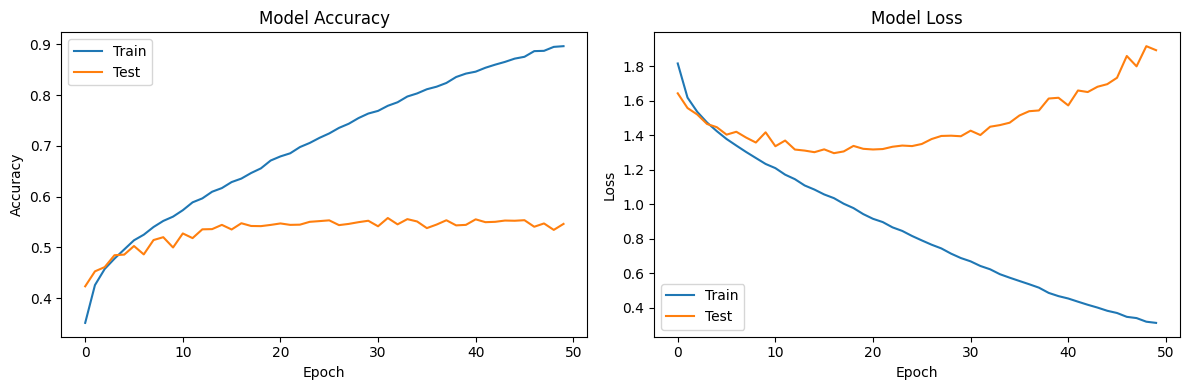

In [ ]:
import numpy as np #NumPy 라이브러리를 가져오는 역할
import tensorflow as tf #TensorFlow 라이브러리를 가져오는 역할
from tensorflow.keras.datasets import cifar10 #TensorFlow의 Keras API를 통해 제공되는 CIFAR-10 데이터셋을 가져오는 역할
from tensorflow.keras.models import Sequential #TensorFlow의 Keras API를 통해 Sequential 모델을 가져오는 역할
from tensorflow.keras.layers import Dense #TensorFlow의 Keras API를 통해 Dense 레이어를 가져오는 역할
from tensorflow.keras.optimizers import Adam #TensorFlow의 Keras API를 통해 Adam 옵티마이저를 가져오는 역할
import matplotlib.pyplot as plt #Matplotlib 라이브러리를 사용하여 데이터 시각화를 위한 pyplot 모듈을 가져오는 역할

# Load CIFAR-10 dataset(이미지 분류를 위한 데이터셋)
(x_train, y_train), (x_test, y_test) = cifar10.load_data() #CIFAR-10 데이터셋을 불러와서 훈련 데이터와 테스트 데이터로 나누는 역할

# 데이터 전처리
x_train = x_train.reshape(50000, 3072).astype(np.float32) / 255.0 #CIFAR-10 데이터셋의 이미지 데이터를 전처리하는 역할
x_test = x_test.reshape(10000, 3072).astype(np.float32) / 255.0 #CIFAR-10 데이터셋의 테스트 데이터의 이미지 데이터를 전처리하는 역할
y_train = tf.keras.utils.to_categorical(y_train, 10) #CIFAR-10 데이터셋의 훈련 데이터의 레이블을 전처리하는 역할
y_test = tf.keras.utils.to_categorical(y_test, 10) #CIFAR-10 데이터셋의 테스트 데이터의 레이블을 전처리하는 역할

# Create the model(모델 생성)
dmlp = Sequential() #딥 러닝 모델에서 사용되는 Sequential 모델을 생성하는 역할
dmlp.add(Dense(units=1024, activation='relu', input_shape=(3072,))) # Sequential 모델인 `dmlp`에 새로운 층을 추가하는 역할
dmlp.add(Dense(units=512, activation='relu')) #Sequential 모델 `dmlp`에 또 다른 `Dense` 층을 추가하는 역할
dmlp.add(Dense(units=512, activation='relu')) #Sequential 모델 `dmlp`에 새로운 `Dense` 층을 추가하는 역할
dmlp.add(Dense(units=10, activation='softmax')) #Sequential 모델 `dmlp`에 새로운 `Dense` 층을 추가하는 역할

# Compile the model(모델 컴파일)
dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy']) #Sequential 모델 `dmlp`를 컴파일하는 역할

# 학습 곡선 표시를 위한 모델 학습 과정 및 수집
hist = dmlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2) #Sequential 모델 `dmlp`를 주어진 데이터로 학습시키는 역할

# 정확도 평가 및 출력
accuracy = dmlp.evaluate(x_test, y_test, verbose=0)[1] * 100 #학습된 모델 `dmlp`를 사용하여 테스트 데이터 `x_test`와 레이블 `y_test`에 대한 정확도를 평가하는 역할
print('Accuracy=', accuracy) #변수 `accuracy`에 저장된 정확도를 출력하는 역할

# 학습 곡선 시각화
plt.figure(figsize=(12, 4)) #Matplotlib 라이브러리를 사용하여 그래프를 그리기 위한 새로운 그림(figure)을 생성하는 역할

#학습 및 검증 정확도 값을 그래프로 나타냄
plt.subplot(1, 2, 1) #Matplotlib 라이브러리를 사용하여 여러 개의 서브플롯(subplot) 중 첫 번째 서브플롯을 선택하는 역할
plt.plot(hist.history['accuracy'], label='Train') #Matplotlib 라이브러리를 사용하여 선 그래프를 그리는 역할
plt.plot(hist.history['val_accuracy'], label='Test') #Matplotlib 라이브러리를 사용하여 두 번째 선 그래프를 그리는 역할
plt.title('Model Accuracy') #Matplotlib 라이브러리를 사용하여 그래프의 제목을 설정하는 역할
plt.xlabel('Epoch') #Matplotlib 라이브러리를 사용하여 x축의 라벨을 설정하는 역할
plt.ylabel('Accuracy') #Matplotlib 라이브러리를 사용하여 y축의 라벨을 설정하는 역할
plt.legend() #Matplotlib 라이브러리를 사용하여 그래프의 범례(legend)를 표시하는 역할

#학습 및 검증 손실 값 표시
plt.subplot(1, 2, 2) #Matplotlib 라이브러리를 사용하여 그래프를 여러 개의 서브플롯(subplot)으로 나누고, 현재 작업 중인 서브플롯을 선택하는 역할
plt.plot(hist.history['loss'], label='Train') #Matplotlib 라이브러리를 사용하여 그래프를 그리는 역할
plt.plot(hist.history['val_loss'], label='Test') #Matplotlib 라이브러리를 사용하여 그래프를 그리는 역할
plt.title('Model Loss') #Matplotlib 라이브러리를 사용하여 그래프의 제목을 설정하는 역할
plt.xlabel('Epoch') #Matplotlib 라이브러리를 사용하여 x축의 레이블(label)을 설정하는 역할
plt.ylabel('Loss') #Matplotlib 라이브러리를 사용하여 y축의 레이블(label)을 설정하는 역할
plt.legend() #Matplotlib 라이브러리를 사용하여 그래프에 범례(legend)를 추가하는 역할

plt.tight_layout() #Matplotlib 라이브러리를 사용하여 그래프의 레이아웃(layout)을 자동으로 조정하는 역할
plt.show() #Matplotlib 라이브러리를 사용하여 그래프를 화면에 출력
